In [199]:
# Alan Alfredo Onofre Chavez
# Viktor Konupcik

# Importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Reading the dataset

We use pandas to read to csv files and print the first and last columns to watch the next features:

1) The variables contain inside the dataset

2) Have a general overview from the dataset

In [200]:
# Reading the dataset
data = pd.read_csv(r"..\Project\X_train.csv")

# Printing the five columns of our dataset
data.head(5)

,Protocol,Info,Length,Delta,Type
0,HCI_EVT,Rcvd Link Key Request,9,0.010473,au_rand_flooding
1,HCI_CMD,Sent Link Key Request Negative Reply,10,0.010473,au_rand_flooding
2,HCI_EVT,Rcvd Link Key Request,9,0.017913,au_rand_flooding
3,HCI_EVT,Rcvd Command Complete (Link Key Request Negati...,13,0.002642,au_rand_flooding
4,HCI_CMD,Sent Link Key Request Negative Reply,10,0.002882,au_rand_flooding


In [201]:
# Printing the last five columns of our dataset
data.tail(10)

,Protocol,Info,Length,Delta,Type
6392,OBEX,Rcvd OBEX fragment,1004,0.009528,normal
6393,HCI_EVT,Rcvd Number of Completed Packets,8,0.011079,normal
6394,OBEX,Rcvd OBEX fragment,1004,0.002127,normal
6395,RFCOMM,Sent UIH Channel=12 UID,14,0.006693,normal
6396,OBEX,Rcvd Put continue,106,0.001196,normal
6397,RFCOMM,Sent UIH Channel=12 UID,14,0.006531,normal
6398,HCI_EVT,Rcvd Number of Completed Packets,8,0.004969,normal
6399,OBEX,Sent Continue,21,0.014489,normal
6400,LMP,LMP_power_control_req,64,0.003510,normal
6401,LMP,LMP_power_control_res,64,0.001288,normal


### Visualization of our dataset

After loading the dataset, we view the next characteristics:

- The length of the dataset

- The variable name for the columns

- The type of value in each column

In [202]:
# Size of the dataset
print("Length of the dataset: ", len(data))

# Use of columns to see the variables
print("Columns: ", data.columns)

# Check the type of data for each column
print(data.dtypes)

Length of the dataset:  6402
Columns:  Index(['Protocol', 'Info', 'Length', 'Delta', 'Type'], dtype='object')
Protocol     object
Info         object
Length        int64
Delta       float64
Type         object
dtype: object


In [203]:
# Number of times that each distinct value of a variable occurs
data['Type'].value_counts()

normal                             4055
au_rand_flooding                    526
truncated_sco_link_request          304
duplicated_iocap                    277
invalid_feature_page_execution      239
truncated_lmp_accepted              236
invalid_timing_accuracy             188
feature_response_flooding           161
lmp_overflow_dm1                    142
lmp_auto_rate_overflow              124
duplicated_encapsulated_payload      94
invalid_setup_complete               56
Name: Type, dtype: int64

In [204]:
# Seen if there is non-readable data
data.notnull().sum()

Protocol    6402
Info        6402
Length      6402
Delta       6402
Type        6402
dtype: int64

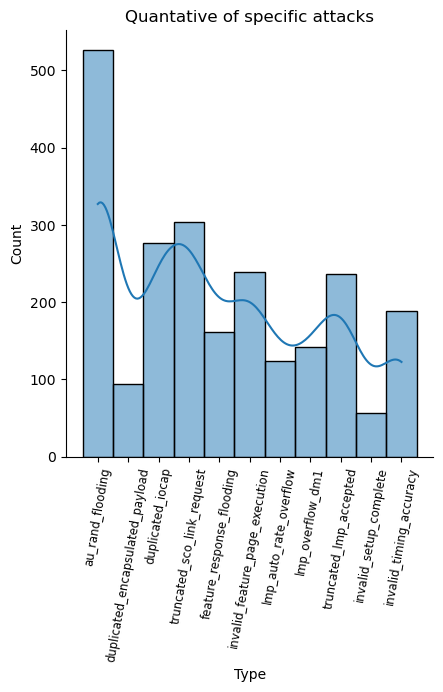

In [225]:
# Filtering normal variable
filtered_data = data[data['Type'] != 'normal']

# Making a histogram for the variable type
sns.displot(data=filtered_data['Type'], kde = True)
plt.title("Quantative of specific attacks")

# Rotating the names of columns so they are readible
plt.xticks(rotation=80, fontsize = 'small')
plt.show()

### Analyzing dataset of test file

We do the same process explained previously in the test file and watch if there is some irregularities as null variables or repeated columns

In [206]:
data_test = pd.read_csv(r'..\Project\X_test.csv')
data_test.shape

(691, 4)

In [207]:
# Printing the first 8 rows
data_test.head(8)

,Protocol,Info,Length,Delta
0,Baseband,FHS,28,1.246406
1,Baseband,FHS,28,1.256744
2,Baseband,FHS,28,0.073231
3,Baseband,FHS,28,0.076976
4,Baseband,FHS,28,1.210525
5,Baseband,FHS,28,0.079468
6,Baseband,FHS,28,1.211332
7,Baseband,FHS,28,0.077530


In [208]:
# Visualizing our dataset
# Size of the dataset
print("Length of the dataset: ", len(data_test))

# Use of columns to see the variables
print("Columns: ", data_test.columns)

# Check the type of data for each column
print(data_test.dtypes)

Length of the dataset:  691
Columns:  Index(['Protocol', 'Info', 'Length', 'Delta'], dtype='object')
Protocol     object
Info         object
Length        int64
Delta       float64
dtype: object


In [209]:
# Check if there is non-readable data
data_test.notnull().sum()

Protocol    691
Info        691
Length      691
Delta       691
dtype: int64

### Perform one-hot encoding to transform strings to integers

One-hot encoding is known as the representation of categorical variables as binary vectors. These categorical values are first mapped to integer values, so each one of it is represented as a binary vector that is all 0s.

To sum up, we use this technique to transfom string values to integers

In [210]:
# Implementing one-hot encoding for Type
label_encoder = LabelEncoder()
type_encoded = label_encoder.fit_transform(data['Type'])
print(type_encoded)
type_encoded = type_encoded.reshape(len(type_encoded), 1)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_type = onehot_encoder.fit_transform(type_encoded)
print(onehot_type)

[0 0 0 ... 9 9 9]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


D:\Apps\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [211]:
# Implementing one-hot encoding for protocol
protocol_encoded = label_encoder.fit_transform(data['Protocol'])
protocol_encoded = protocol_encoded.reshape(len(protocol_encoded), 1)

onehot_protocol = onehot_encoder.fit_transform(protocol_encoded)
print(protocol_encoded)

[[4]
 [3]
 [4]
 ...
 [7]
 [6]
 [6]]


D:\Apps\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Implementing KNN for classification

As the main goal is to known which kind of attack is, we are facing a classification problem. So we decided to implement the K-Nearest-Neighbors which is good for this type of problem 

The KNN, better known as K-Neighbors, gives a new point $x_0$, KNN:

1) Identifies the $K$ observations that are closest to $x_0$, denoted by $\mathcal{N}_0$

2) Estimates the class $k$ of $x_0$ using a majority vote: The prediction is the most commonly occurring class among the classes in $\mathcal{N}_0$

To sum up, the conditional probability for class $k$ as the fraction of points in $\mathcal{N}_0$ whose response values equals to $k$:
$$\mathbb{P}(y_0=k|X=x_0)=\frac{1}{K} = \frac{1}{K}\sum_{x_i\in \mathcal{N}_0}I(y_i=k)$$

In [ ]:
# Prepare dataset
x = onehot_protocol
y = onehot_type

# Declare train
best_accuracy_train = 0
best_seed_train = 0
best_k_train = 0

# Declare test
best_accuracy_test = 0
best_seed_test = 0
best_k_test = 0

# Fisrt cycle to determine best K.
# It goes from 1 to 3 because K higher than 3 did not bring great results (data for that in test data folder)
for k in range (1,3):
    
    #Second cycle is for seed where the values varies more
    for seed in range(1, 22):
        
        # assigning to vars
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = seed)

        # Chosing KNeighborsClassifier according to k from fist cycle
        clf = KNeighborsClassifier(n_neighbors=k)
        
        # Fitting data to clf
        clf.fit(x_train, y_train)
        
        # Predicting
        y_pred_train = clf.predict(x_train)
        y_pred_test = clf.predict(x_test)
    
        # Accuracy calculation
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        
        # Print for us to know how the code goes and that we have more data to work with
        text = 'K={:>2} Seed={:>2} accuracy_train={:3.1f}% accuracy_test={:3.1f}%'.format(k,seed,100*accuracy_train,100*accuracy_test)
        print(text)
        
        # Both if decide if the accuracy score is better than the best so far. First is for train and second for test
        if accuracy_train > best_accuracy_train:
            best_accuracy_train = accuracy_train
            best_seed_train = seed            
            best_k_train = k
            DF = pd.DataFrame(y_pred_train)
            DF.to_csv('../Test_examples/data_test.csv')

        if accuracy_test > best_accuracy_test:
            best_accuracy_test = accuracy_test
            best_seed_test = seed
            best_k_test = k
            DF = pd.DataFrame(y_pred_test)
            DF.to_csv('../Test_examples/data_train.csv')
        
# Printing the overall results
print(f"Best k train: {best_k_train}")
print(f"Best seed train: {best_seed_train}")
print('Best prediction are {:3.1f}% accurate on the training set. '.format(100*best_accuracy_train))

print(f"Best k test: {best_k_test}")
print(f"Best seed test: {best_seed_test}")
print('Best prediction are {:3.1f}% accurate on the test set. '.format(100*best_accuracy_test))

K= 1 Seed= 1 accuracy_train=61.5% accuracy_test=62.1%
K= 1 Seed= 2 accuracy_train=65.1% accuracy_test=63.8%
K= 1 Seed= 3 accuracy_train=61.9% accuracy_test=61.8%
K= 1 Seed= 4 accuracy_train=56.6% accuracy_test=57.0%
K= 1 Seed= 5 accuracy_train=56.6% accuracy_test=56.6%


### Measure accuracy on KNN classifier with standarized data

For better results, normalizing data on the same scale is highly recommended because depending on the scale, the nearest neighbours of a point can change

The standarization allows to obtain a variable of mean $0$ and standard deviation $1$, by the transformation: 

$$x'_i=\frac{x_i - \bar{x}}{\sigma}$$
Where:

1) $\bar{x}$ is the mean of $(x_1,\dots,x_N)$ : $\bar{x}=\frac{1}{N}\sum_{i=1}^{N}$

2) $\sigma$ is the standard deviation of $(x_1,\dots,x_N)$ : $\sigma=\sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^2}$

In [229]:
# KNN clasifier with standarized data
scaler = StandardScaler()

# Standarize dataset
scaler.fit(x)
x_train_std = scaler.transform(x_train)

# Declare k
best_accuracy = 0
best_k = 1

# Fisrt cycle to determine best K.
# More than 10 is not needed as the result is 49.9% after k>5
for k in range (1,10):
    
    # Evaluate and declare the model
    clf_std = KNeighborsClassifier(n_neighbors=k)    
    clf_std.fit(x_train_std, y_train)
    x_test_std = scaler.transform(x_test)
    y_pred_std = clf_std.predict(x_test_std)
    accuracy = accuracy_score(y_test, y_pred_std)
    
    # Print for us to know how the code goes and that we have more data to work with
    text = 'K={:>2} accuracy={:3.1f}%'.format(k,100*accuracy)
    print(text)
    
    # Decide if the accuracy score is better than the best so far. First is for train and second for test
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        DF = pd.DataFrame(y_pred_std)
        DF.to_csv('../Test_examples/data_stan.csv')
        

# Printing the overall results        
print(f"Best k: {best_k_test}")
print('Best prediction are {:3.1f}% accurate. '.format(100*best_accuracy))

K= 1 accuracy=58.5%
K= 2 accuracy=56.2%
K= 3 accuracy=56.7%
K= 4 accuracy=52.6%
K= 5 accuracy=60.0%
K= 6 accuracy=60.0%
K= 7 accuracy=60.0%
K= 8 accuracy=60.0%
K= 9 accuracy=60.0%
Best k: 0
Best prediction are 60.0% accurate. 


### Predictions and results

After implementing our KNN model we obtain results between 55.5% and 65.9% of accuracy for the next reason:

- In the dataset there are some variables that are mixed, for example some protocol repeat itself in different cyber-attacks or have the same information

So, in order to have a better accuracy we could clean the dataset by removing some columns or rows that repeat each other or try other variables to watch how they perform in the model

### Bibliographic References

- Nandikotkur, Achyuth; Traore, Issa; Mamun, Mohammad. Detecting BrakTooth Attacks. In: Secrypt 2023, 20th International Conference on Security and Cryptography, 10-12 July 2023, Rome, Italy.

- https://www.educative.io/answers/one-hot-encoding-in-python